In [244]:
import numpy as np
import pandas as pd
import datetime as dt 
import dataframe_image as dfi
import matplotlib.pyplot as plt
import os
import lifetimes
import lifetimes.utils
import lifetimes.fitters
import lifetimes.plotting
import sklearn.metrics as metrics



In [373]:
transactions = pd.read_csv('../data/processed/sales.csv')
transactions.head()

,Unnamed: 0,Customer ID,Customer,Type,Date,Year,Month,Document Number,Description,Qty,Unit Price,Sales Total,Revenue,State
0,0,100625,Nome Public Schools,Invoice,2020-07-07,2020,7,INV19283,Safari Montage - K-12 Super Core Content Packa...,1,2750.0,2750.0,2750.0,AK
1,1,100625,Nome Public Schools,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Additional Schlessinger Media K...,1,495.0,495.0,495.0,AK
2,2,100625,Nome Public Schools,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Algebra's Cool - Content Packag...,1,500.0,500.0,500.0,AK
3,3,100625,Nome Public Schools,Invoice,2020-07-07,2020,7,INV19283,SAFARI Montage Learning Object Repository Annu...,1,1500.0,1500.0,1500.0,AK
4,4,100625,Nome Public Schools,Invoice,2020-07-07,2020,7,INV19283,Safari Montage Math's Cool - Content Package (...,1,500.0,500.0,500.0,AK


In [462]:
year_group = pd.DataFrame(transactions.groupby('Year')['Sales Total'].sum())
year_group

,Sales Total
Year,
2015,4063691.13
2016,5113272.83
2017,7978273.52
2018,10092361.70
2019,13121301.30
2020,14769183.08


In [463]:
customers_per_yr =  pd.DataFrame(transactions.groupby('Year')['Customer ID'].nunique())
customers_per_yr

,Customer ID
Year,
2015,447
2016,409
2017,349
2018,322
2019,252
2020,226


In [464]:
orders_per_yr = pd.DataFrame(transactions.groupby('Year')['Document Number'].nunique())
orders_per_yr

,Document Number
Year,
2015,1271
2016,1143
2017,947
2018,751
2019,703
2020,538


In [472]:

#year_group = year_group.merge(customers_per_yr, on='Year')
#year_group = year_group.merge(orders_per_yr, on='Year')

year_group.columns  = ['Sales_yr', 'Customers_yr', 'Orders_yr']
year_group = year_group.reset_index()
year_group

,Year,Sales_yr,Customers_yr,Orders_yr
0,2015,4063691.13,447,1271
1,2016,5113272.83,409,1143
2,2017,7978273.52,349,947
3,2018,10092361.70,322,751
4,2019,13121301.30,252,703
5,2020,14769183.08,226,538


In [506]:
year_group['avg_order_value'] = round(year_group['Sales_yr'] / year_group['Orders_yr'],2)
year_group['avg_sales_cust'] = round(year_group['Sales_yr'] / year_group['Customers_yr'],2)

year_group.sort_values(by='Year', ascending=False)

,Year,Sales_yr,Customers_yr,Orders_yr,avg_order_value,avg_sales_cust
5,2020,14769183.08,226,538,27452.01,65350.37
4,2019,13121301.30,252,703,18664.72,52068.66
3,2018,10092361.70,322,751,13438.56,31342.74
2,2017,7978273.52,349,947,8424.79,22860.38
1,2016,5113272.83,409,1143,4473.55,12501.89
0,2015,4063691.13,447,1271,3197.24,9091.03


In [ ]:
year_group.save

In [246]:
transactions[transactions['Customer ID']==101012]

,Unnamed: 0,Customer ID,Customer,Type,Date,Year,Month,Document Number,Description,Qty,Unit Price,Sales Total,Revenue,State
781,792,101012,XIT Solutions,Invoice,2020-01-27,2020,1,INV19017,Audio Enhancement ceiling speaker kit. Include...,4,100.0,400.0,400.0,CA
782,793,101012,XIT Solutions,Invoice,2020-03-31,2020,3,INV19138,Audio Enhancement wall speaker - WS-09,30,52.0,1560.0,1560.0,CA
783,794,101012,XIT Solutions,Invoice,2019-10-29,2019,10,INV18852,Audio Enhancement ceiling speaker kit. Include...,50,56.0,2800.0,2800.0,CA
784,795,101012,XIT Solutions,Invoice,2019-06-03,2019,6,INV18442,Audio Enhancement ceiling speaker kit. Include...,80,56.0,4480.0,4480.0,CA
785,796,101012,XIT Solutions,Invoice,2019-02-01,2019,2,INV18198,Audio Enhancement ceiling speaker kit. Include...,40,56.0,2240.0,2240.0,CA
786,797,101012,XIT Solutions,Invoice,2019-08-20,2019,8,INV18640,Audio Enhancement ceiling speaker kit. Include...,60,56.0,3360.0,3360.0,CA
787,798,101012,XIT Solutions,Invoice,2019-06-03,2019,6,INV18442,Audio Enhancement wall speaker kit. Includes 1...,40,52.0,2080.0,2080.0,CA
788,799,101012,XIT Solutions,Invoice,2019-02-01,2019,2,INV18198,Audio Enhancement wall speaker kit. Includes 1...,80,52.0,4160.0,4160.0,CA
789,800,101012,XIT Solutions,Invoice,2019-05-13,2019,5,INV18401,Audio Enhancement wall speaker kit. Includes 1...,80,52.0,4160.0,4160.0,CA
790,801,101012,XIT Solutions,Invoice,2019-12-31,2019,12,INV18980,Audio Enhancement XDSolo Speaker System with B...,1,1075.0,1075.0,1075.0,CA


In [247]:
transactions[transactions['Year']==2020]['Document Number'].nunique()

538

In [248]:
transactions[transactions['Year']==2020]['Customer ID'].nunique()

226

In [249]:
print(round(transactions[transactions['Year']==2020]['Sales Total'].sum(),2))
print(round(transactions[transactions['Year']==2020]['Sales Total'].mean(),2))


14769183.08
14565.27


In [438]:
def get_year_stats(df=transactions, year=2020):
    stats = pd.DataFrame({'orders'            : df[df['Year']==year]['Document Number'].nunique(),
                            'customers'       : df[df['Year']==year]['Customer ID'].nunique(),
                            'avg_order_value' : df[df['Year']==2020]['Sales Total'].mean(),
                            'total_sales'     : df[df['Year']==2020]['Sales Total'].sum(),
                        }, index=[year])
    return stats
    

In [439]:
stats_actuals_2020 = get_year_stats(df=transactions, year=2020)
stats_actuals_2020['Rev_per_Customer'] = stats_actuals_2020['total_sales'] / stats_actuals_2020['customers'] 

stats_actuals_2020


,orders,customers,avg_order_value,total_sales,Rev_per_Customer
2020,538,226,14565.26931,14769183.08,65350.367611


In [252]:
# stats_actuals_2020['Avg_Num_Transaction_Cust'] = 
# stats_actuals_2020['Avg_Value_Sale_Cust'] = 

In [253]:


# stats_actuals_2020['LTV'] = stats_actuals_2020['avg_sale_per_transaction'] * stats_actuals_2020['unique_transactions'] 
# stats_actuals_2020

In [255]:
# for y in [2015,2016,2017,2018,2019,2020]:
#     stats[y] = get_year_stats(df=transactions, year=y)
# return df

In [ ]:
first_invoice = pd.DataFrame(transactions.groupby('Customer ID')['Date'].min())
first_invoice = first_invoice.reset_index()
first_invoice.columns = ['Customer ID', 'first_invoice_date']
first_invoice 

In [ ]:
last_invoice = pd.DataFrame(transactions.groupby('Customer ID')['Date'].max())
last_invoice = last_invoice.reset_index()
last_invoice.columns = ['Customer ID', 'last_invoice_date']
last_invoice

In [482]:
# EXAMPLE #sales= sales.merge(customer_keys, on='Customer')
#invoice_dates = first_invoice.merge(last_invoice ,on='Customer ID' )



invoice_dates['first_invoice_date'] = pd.to_datetime(invoice_dates['first_invoice_date'])
invoice_dates['cohort'] = invoice_dates['first_invoice_date'].dt.year
invoice_dates

,Customer ID,first_invoice_date,last_invoice_date,cohort
0,100001,2017-02-02,2017-02-02,2017
1,100002,2020-07-07,2020-07-07,2020
2,100004,2015-01-07,2016-02-22,2015
3,100005,2017-05-30,2017-05-30,2017
4,100006,2016-08-31,2016-08-31,2016
...,...,...,...,...
983,101012,2018-04-16,2020-03-31,2018
984,101014,2015-09-29,2020-06-05,2015
985,101015,2015-10-12,2015-11-09,2015
986,101016,2018-09-19,2018-09-19,2018


# RFM ACTUALS

In [261]:
rfm_actuals = lifetimes.utils.summary_data_from_transaction_data(transactions, 
                                                                customer_id_col = 'Customer ID',
                                                                datetime_col = 'Date',
                                                                monetary_value_col= 'Sales Total',
                                                                observation_period_end=None,
                                                                freq='D',
                                                                freq_multiplier=1)
rfm_actuals.reset_index()
rfm_actuals

,frequency,recency,T,monetary_value
Customer ID,,,,
100001,0.0,0.0,1428.0,0.000000
100002,0.0,0.0,177.0,0.000000
100004,5.0,411.0,2185.0,4713.950000
100005,0.0,0.0,1311.0,0.000000
100006,0.0,0.0,1583.0,0.000000
...,...,...,...,...
101012,13.0,715.0,990.0,3849.615385
101014,7.0,1711.0,1920.0,12006.142857
101015,2.0,28.0,1907.0,2812.000000


In [445]:
rfm_actuals.mean()

frequency            3.765182
recency            520.477733
T                 1534.687247
monetary_value    4679.437795
dtype: float64

In [487]:
#rfm_actuals = rfm_actuals.merge(invoice_dates, on='Customer ID')
rfm_actuals = rfm_actuals[['Customer ID', 'cohort', 'frequency', 'recency', 'T', 'monetary_value',
       'first_invoice_date', 'last_invoice_date' ]]
rfm_actuals

,Customer ID,cohort,frequency,recency,T,monetary_value,first_invoice_date,last_invoice_date
0,100001,2017,0.0,0.0,1428.0,0.000000,2017-02-02,2017-02-02
1,100002,2020,0.0,0.0,177.0,0.000000,2020-07-07,2020-07-07
2,100004,2015,5.0,411.0,2185.0,4713.950000,2015-01-07,2016-02-22
3,100005,2017,0.0,0.0,1311.0,0.000000,2017-05-30,2017-05-30
4,100006,2016,0.0,0.0,1583.0,0.000000,2016-08-31,2016-08-31
...,...,...,...,...,...,...,...,...
983,101012,2018,13.0,715.0,990.0,3849.615385,2018-04-16,2020-03-31
984,101014,2015,7.0,1711.0,1920.0,12006.142857,2015-09-29,2020-06-05
985,101015,2015,2.0,28.0,1907.0,2812.000000,2015-10-12,2015-11-09
986,101016,2018,0.0,0.0,834.0,0.000000,2018-09-19,2018-09-19


In [488]:
rfm_actuals.mean()

Customer ID       100508.314777
cohort              2016.353239
frequency              3.765182
recency              520.477733
T                   1534.687247
monetary_value      4679.437795
dtype: float64

In [499]:
cohort_means = rfm_actuals.groupby('cohort').mean()
cohort_means.reset_index()

,cohort,Customer ID,frequency,recency,T,monetary_value
0,2015,100506.434004,6.187919,801.778523,2048.369128,3244.847919
1,2016,100481.252747,2.554945,498.631868,1659.137363,6036.850484
2,2017,100535.539683,2.007937,312.452381,1282.015873,7950.664259
3,2018,100498.428571,1.285714,167.397959,925.275510,5033.342328
4,2019,100517.803030,1.090909,105.772727,537.969697,3460.055741
5,2020,100547.130435,0.550725,33.782609,158.985507,5082.837826


KeyError: 'Year'

In [263]:
rfm_actuals[rfm_actuals['Customer ID']==101012]

,Customer ID,frequency,recency,T,monetary_value,first_invoice_date,last_invoice_date
983,101012,13.0,715.0,990.0,3849.615385,2018-04-16,2020-03-31


In [264]:
rfm_actuals['first_invoice_date']=pd.to_datetime(rfm_actuals['first_invoice_date'])
rfm_actuals['last_invoice_date']=pd.to_datetime(rfm_actuals['last_invoice_date'])

In [265]:
rfm_actuals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         988 non-null    int64         
 1   frequency           988 non-null    float64       
 2   recency             988 non-null    float64       
 3   T                   988 non-null    float64       
 4   monetary_value      988 non-null    float64       
 5   first_invoice_date  988 non-null    datetime64[ns]
 6   last_invoice_date   988 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 61.8 KB


In [266]:
rfm_actuals.describe().round(2)

,Customer ID,frequency,recency,T,monetary_value
count,988.00,988.00,988.00,988.00,988.00
mean,100508.31,3.77,520.48,1534.69,4679.44
std,292.89,8.47,642.18,613.55,16398.40
min,100001.00,0.00,0.00,2.00,0.00
25%,100255.75,0.00,0.00,1164.75,0.00
50%,100508.50,1.00,175.00,1746.00,861.17
75%,100761.25,4.00,995.75,2044.00,2999.00
max,101017.00,111.00,2154.00,2186.00,300996.34


In [278]:
frequency_mean_actuals = rfm_actuals['frequency'].mean()
recency_mean_actuals = rfm_actuals['recency'].mean()

print('Avg customer makes ',round(frequency_mean_actuals,2), 'purchases in their customer lifetime')
print('Avg customer makes a purchase once every ',round(recency_mean_actuals/90,1), 'quarters or ',round(recency_mean_actuals/30,1),  'months')


Avg customer makes  3.77 purchases in their customer lifetime
Avg customer makes a purchase once every  5.8 quarters or  17.3 months


# SPLIT

In [ ]:
calibration_period_end='2019-12-31'
observation_period_end='2020-12-31'

In [501]:
rfm_train_test = lifetimes.utils.calibration_and_holdout_data(transactions,'Customer ID', 'Date', 
                                                                        calibration_period_end='2019-12-31',
                                                                        observation_period_end='2020-12-31',
                                                                         monetary_value_col = 'Sales Total')


# filter out negatives
rfm_train_test = rfm_train_test.loc[rfm_train_test['frequency_cal'] >0,:]
rfm_train_test



,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
Customer ID,,,,,,,
100004,5.0,411.0,1819.0,4713.950000,0.0,0.0,366.0
100007,8.0,1343.0,1706.0,1985.412500,0.0,0.0,366.0
100008,1.0,392.0,981.0,2595.000000,0.0,0.0,366.0
100009,1.0,34.0,1586.0,1102.000000,0.0,0.0,366.0
100010,1.0,48.0,1197.0,350.000000,0.0,0.0,366.0
...,...,...,...,...,...,...,...
101011,8.0,1442.0,1775.0,218.750000,1.0,99.0,366.0
101012,11.0,624.0,624.0,4371.363636,2.0,980.0,366.0
101014,5.0,1534.0,1554.0,13208.600000,2.0,9000.0,366.0


In [391]:
train = rfm_train_test[['frequency_cal', 'recency_cal', 'T_cal']]
test  = rfm_train_test[['frequency_holdout', 'duration_holdout']]
rfm_train_test.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
Customer ID,,,,,,,
100004,5.0,411.0,1819.0,4713.9500,0.0,0.0,366.0
100007,8.0,1343.0,1706.0,1985.4125,0.0,0.0,366.0
100008,1.0,392.0,981.0,2595.0000,0.0,0.0,366.0
100009,1.0,34.0,1586.0,1102.0000,0.0,0.0,366.0
100010,1.0,48.0,1197.0,350.0000,0.0,0.0,366.0


In [392]:
rfm_train_test['monetary_value_cal'].describe()

count       603.000000
mean       7918.223697
std       35381.873398
min          30.000000
25%         837.431818
50%        1964.703704
75%        4482.750000
max      715520.000000
Name: monetary_value_cal, dtype: float64

# TRAIN THE MODEL

In [393]:
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(rfm_train_test['frequency_cal'], rfm_train_test['recency_cal'], rfm_train_test['T_cal'])
print(bgf.summary)

             coef   se(coef)  lower 95% bound  upper 95% bound
r        2.122966   0.174515         1.780917         2.465015
alpha  271.365893  25.984901       220.435486       322.296300
a        0.874032   0.137899         0.603751         1.144313
b        3.306575   0.702709         1.929265         4.683885


<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

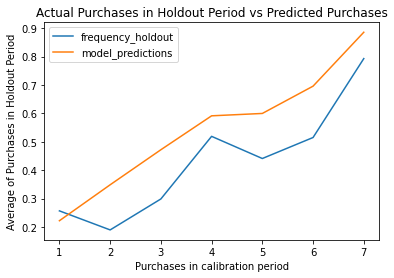

In [394]:
lifetimes.plotting.plot_calibration_purchases_vs_holdout_purchases(bgf,rfm_train_test)

# Predict

In [330]:
# predicted_bgf = bgf.predict((dt.datetime(2020, 12, 31)- dt.datetime(2019, 12, 31)).days,
#                            rfm_train_test['frequency_cal'],
#                            rfm_train_test['recency_cal'],
#                            rfm_train_test['T_cal'])

In [395]:
t =365
predicted_bgf = round(bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                                              rfm_train_test['frequency_cal'],
                                                                              rfm_train_test['recency_cal'],
                                                                              rfm_train_test['T_cal']))





rfm_train_test['predicted_purchases'] = predicted_bgf

rfm_train_test.sort_values(by='predicted_purchases', ascending=False).head(10).reset_index()
print('\n--------------------------')
print('Predicted Purchase mean :', rfm_train_test['predicted_purchases'].mean())
rfm_train_test.sort_values(by='predicted_purchases').tail(5)



--------------------------
Predicted Purchase mean : 0.7412935323383084


,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases
Customer ID,,,,,,,,
100985,74.0,1787.0,1807.0,14531.837838,5.0,1086.400000,366.0,12.0
100567,72.0,1778.0,1812.0,11840.855139,4.0,744.000000,366.0,12.0
100488,84.0,1814.0,1819.0,10018.933095,8.0,9316.740000,366.0,14.0
100479,91.0,1771.0,1779.0,54688.492198,20.0,32132.381579,366.0,15.0
100608,96.0,1802.0,1807.0,33207.181146,9.0,15895.211765,366.0,16.0


# Evaluate

In [396]:
actual_freq = rfm_train_test['frequency_holdout']
predicted_freq = predicted_bgf
print('2020 Actual Average Frequency ',round(actual_freq.mean(),4))
print('2020 Predicted Average Frequency ', round(predicted_freq.mean(),4))

2020 Actual Average Frequency  0.5755
2020 Predicted Average Frequency  0.7413


In [397]:
print('Average absolute error, ', metrics.mean_absolute_error(actual_freq, predicted_freq) )

Average absolute error,  0.6766169154228856


In [409]:
evaluation = pd.DataFrame({'t'                            : t,
                            '2020_Actual_Avg_Frequency'   : round(actual_freq.mean(),4),
                            '2020_Predicted_Avg_Frequency': round(predicted_freq.mean(),4),
                            'Average absolute error'      : metrics.mean_absolute_error(actual_freq, predicted_freq)
                          },index=['bgf'])
evaluation.transpose()

,bgf
t,365.000000
2020_Actual_Avg_Frequency,0.575500
2020_Predicted_Avg_Frequency,0.741300
Average absolute error,0.676617


In [402]:
rfm_actuals['probability_alive'] = bgf.conditional_probability_alive(rfm_actuals['frequency'], rfm_actuals['recency'], rfm_actuals['T'])
print('Mean probability a customer is alive is ' , round(rfm_actuals['probability_alive'].mean(),2)*100,'%')

Mean probability a customer is alive is  55.00000000000001 %


In [403]:
rfm_actuals.head()

,Customer ID,frequency,recency,T,monetary_value,first_invoice_date,last_invoice_date,probability_alive
0,100001,0.0,0.0,1428.0,0.00,2017-02-02,2017-02-02,1.000000
1,100002,0.0,0.0,177.0,0.00,2020-07-07,2020-07-07,1.000000
2,100004,5.0,411.0,2185.0,4713.95,2015-01-07,2016-02-22,0.000911
3,100005,0.0,0.0,1311.0,0.00,2017-05-30,2017-05-30,1.000000
4,100006,0.0,0.0,1583.0,0.00,2016-08-31,2016-08-31,1.000000


In [404]:
rfm_train_test['monetary_value_cal'].describe()

count       603.000000
mean       7918.223697
std       35381.873398
min          30.000000
25%         837.431818
50%        1964.703704
75%        4482.750000
max      715520.000000
Name: monetary_value_cal, dtype: float64

# Fit Gamma-Gamma Model

In [405]:
rfm_train_test[['monetary_value_cal', 'frequency_cal']].corr()

,monetary_value_cal,frequency_cal
monetary_value_cal,1.000000,0.042074
frequency_cal,0.042074,1.000000


In [406]:

# rfm_train_test = rfm_train_test.dropna([monetary_value_cal])


ggf = lifetimes.fitters.gamma_gamma_fitter.GammaGammaFitter(penalizer_coef = 0.0001)
ggf.fit(rfm_train_test['frequency_cal'],
        rfm_train_test['monetary_value_cal'])

<lifetimes.GammaGammaFitter: fitted with 603 subjects, p: 20.38, q: 0.59, v: 21.62>

# Gamma PREDICTION

In [407]:
monetary_pred = ggf.conditional_expected_average_profit(rfm_train_test['frequency_holdout'],
                                                       rfm_train_test['monetary_value_holdout'])



In [410]:
actual_m = rfm_train_test['monetary_value_holdout']
predicted_m = monetary_pred
print('2020 Actual Average Frequency ',round(actual_m.mean(),4))
print('2020 Predicted Average Frequency ', round(predicted_m.mean(),4))
print('Average absolute error, ', metrics.mean_absolute_error(actual_m, predicted_m) )

2020 Actual Average Frequency  1339.2336
2020 Predicted Average Frequency  520.8829
Average absolute error,  853.5659584545234


In [417]:
evaluation = pd.DataFrame({ 'Model'                       : ['bgf'],
                            't'                           : t,
                            '2020_Actual_Avg_Frequency'   : round(actual_freq.mean(),4),
                            '2020_Predicted_Avg_Frequency': round(predicted_freq.mean(),4),
                            'Average absolute error'      : metrics.mean_absolute_error(actual_freq, predicted_freq)
                          },index=['1'])
evaluation

,Model,t,2020_Actual_Avg_Frequency,2020_Predicted_Avg_Frequency,Average absolute error
1,bgf,365,0.5755,0.7413,0.676617


# Predict CLV

In [419]:
clv = ggf.customer_lifetime_value(
    bgf, 
    rfm_train_test['frequency_cal'],
    rfm_train_test['recency_cal'],
    rfm_train_test['T_cal'],
    rfm_train_test['monetary_value_cal'],
    time=365, # 1 yr
    discount_rate = 0.02
)

rfm_train_test['clv'] = clv

In [430]:
rfm_train_test['clv'].mean()

31628.008743825045

In [432]:
rfm_train_test['clv'].sum().round(2)

19071689.27

# Retraining the Model

In [441]:
#RFM

rfm = rfm_actuals = lifetimes.utils.summary_data_from_transaction_data(transactions, 
                                                                customer_id_col = 'Customer ID',
                                                                datetime_col = 'Date',
                                                                monetary_value_col= 'Sales Total',
                                                                observation_period_end=None,
                                                                freq='D',
                                                                freq_multiplier=1)
rfm = rfm.loc[rfm.frequency > 0, :]


#BG/NBD
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(rfm['frequency'], rfm['recency'], rfm['T'])


#GG
ggf = lifetimes.fitters.gamma_gamma_fitter.GammaGammaFitter(penalizer_coef = 0)
ggf.fit(rfm['frequency'], rfm['monetary_value'])

#CLV model
clv = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    rfm['frequency'],
    rfm['recency'],
    rfm['T'],
    rfm['monetary_value'],
    time=4, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
)

rfm['clv'] = clv
rfm['clv'].mean()


3313.912747915247

In [442]:
rfm['clv'].sum()


2147415.4606490796

In [444]:
rfm.mean()

frequency            5.740741
recency            793.567901
T                 1672.324074
monetary_value    7134.698366
clv               3313.912748
dtype: float64

In [447]:
rfm['T'].max()/365

5.989041095890411